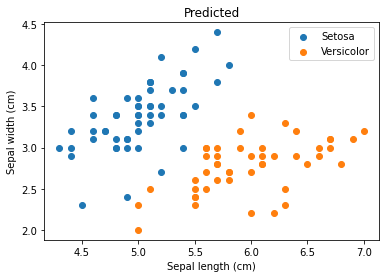

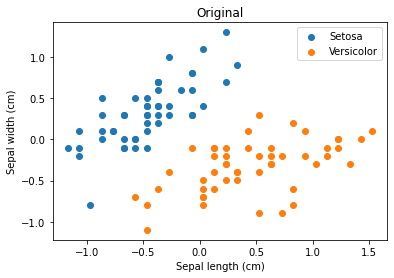

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0] # SetosaとVersicolor、Sepal length
sw_data = iris_data[:100, 1] # SetosaとVersicolor、Sepal width

# 平均値を0に
sl_ave = np.average(sl_data)  # 平均値
sl_data -= sl_ave  # 平均値を引く
sw_ave = np.average(sw_data)
sw_data -= sw_ave

#print(sl_data)
#print(sw_data)
# 入力をリストに格納
input_data = []
for i in range(100):  # iには0から99までが入る
    input_data.append([sl_data[i], sw_data[i]])

#print(input_data)
# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        self.neuron = Neuron()  #ニューロンのインスタンス
        self.w = [0.3, -0.2]
        self.bias = 0.0

    def commit(self, input_data):  # 実行
        self.neuron.reset()

        self.neuron.set_input(input_data[0] * self.w[0])
        self.neuron.set_input(input_data[1] * self.w[1])
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)
# 分類結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

# 比較用に元の分類を散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()